In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt




# Function to apply PCA
def apply_pca(indep_X, n_components=5):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(indep_X)
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained Variance by PCA: {explained_variance}")
    return X_pca


def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
 
def cm_prediction(classifier,X_test):
         y_pred = classifier.predict(X_test)
            
            # Making the Confusion Matrix
         from sklearn.metrics import confusion_matrix
         cm = confusion_matrix(y_test, y_pred)
            
         from sklearn.metrics import accuracy_score 
         from sklearn.metrics import classification_report 
            #from sklearn.metrics import confusion_matrix
            #cm = confusion_matrix(y_test, y_pred)
            
         Accuracy=accuracy_score(y_test, y_pred )
            
         report=classification_report(y_test, y_pred)
         return  classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      
    
def svm_linear(X_train,y_train,X_test):
            from sklearn.svm import SVC
            classifier = SVC(kernel = 'linear', random_state = 0)
            classifier.fit(X_train, y_train)
            classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
            return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test):
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
   
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def principalAnalysis(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [16]:



# Dataset loading and preprocessing
dataset1 = pd.read_csv("wine.csv", index_col=None)
df2 = dataset1
df2 = pd.get_dummies(df2, drop_first=True)

# Correct the target variable
indep_X = df2.drop('Customer_Segment', axis=1)  # Features
dep_Y = df2['Customer_Segment']  # Target




# Split the dataset
X_train, X_test, y_train, y_test = split_scalar(pca_data, dep_Y)



Explained Variance by PCA: [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05]


In [17]:
print(df2.columns)


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')


In [18]:
print(df2.columns)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [19]:
# Apply PCA to the dataset
pca_data = apply_pca(indep_X, n_components=1)


acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]


Explained Variance by PCA: [9.98091230e-01 1.73591562e-03 9.49589576e-05]


In [20]:
pca_data 



array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [21]:
   
X_train, X_test, y_train, y_test = split_scalar(pca_data, dep_Y)   
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=principalAnalysis(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)


C:\Users\sindhiya maria\AppData\Local\Temp\ipykernel_21724\3476539662.py:115: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe['Logistic'][idex]=acclog[number]
C:\Users\sindhiya maria\AppData\Local\Temp\ipykernel_21724\3476539662.py:1

In [32]:
result
#5

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.933333,0.933333,0.977778,0.955556,0.977778,0.933333,0.933333


In [22]:
result 
#3

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.911111,0.888889,0.866667,0.822222,0.866667,0.844444,0.888889


In [40]:
result
#2

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.822222,0.822222,0.822222,0.711111,0.8,0.688889,0.822222


In [36]:
result
#4

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.911111,0.911111,0.933333,0.911111,0.955556,0.911111,0.911111


Explained Variance by PCA Components: [0.36884109 0.19318394]
Confusion Matrix:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


C:\Users\sindhiya maria\AppData\Local\Temp\ipykernel_21724\4053743150.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


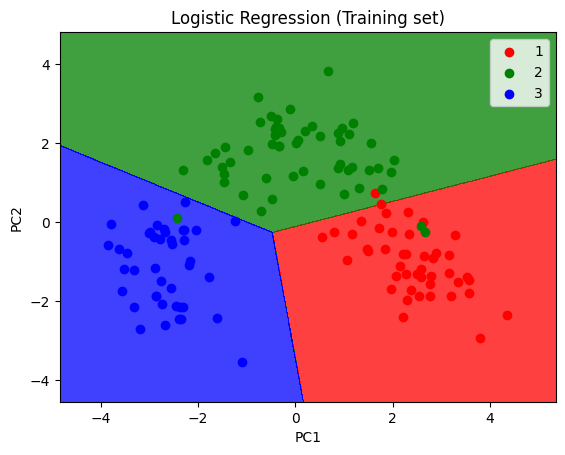

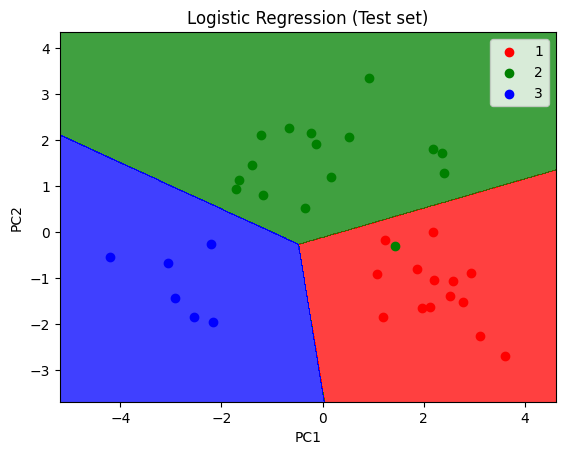

In [14]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Load the dataset (Assuming 'Wine.csv' is available in the same directory)
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by PCA Components:", explained_variance)

# Training Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualizing the Training set results
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualizing the Test set results
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
